In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
import tensorflow as tf

In [6]:
import cv2

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
print(os.listdir("UTKface_Aligned_cropped"))

['crop_part1', 'crop_part1.tar.gz', 'UTKFace', 'UTKFace.tar.gz']


In [10]:
onlyfiles = os.listdir("UTKface_Aligned_cropped/UTKFace")

In [11]:
Y1=np.array([[i.split('_')[1]] for i in onlyfiles])

In [12]:
print(Y1.shape)
print(Y1[0])

(23708, 1)
['0']


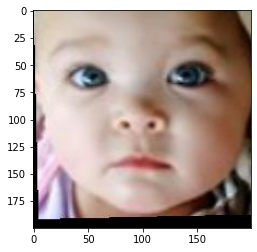

In [13]:
img1=mpimg.imread("UTKface_Aligned_cropped/UTKFace/1_0_0_20161219154018476.jpg.chip.jpg")
imgplot1=plt.imshow(img1)
plt.show()

In [14]:
x_data=[]
for file in onlyfiles:
    img=cv2.imread("UTKface_Aligned_cropped/UTKFace"+'/'+file)
    img=cv2.resize(img,(48,48))
    x_data.append(img)
x_data= np.array(x_data)
print(x_data.shape)

(23708, 48, 48, 3)


In [15]:
gender_labels= ["Male","Female"]
Y=[]
for i in Y1:
    i= int(i)
    if i == 0:
        Y.append(0)
    else:
        Y.append(1)
Y= np.array(Y)
print(Y.shape) 

(23708,)


In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(x_data,Y,test_size=0.3,shuffle=True,random_state=1)

In [17]:
X_train.shape

(16595, 48, 48, 3)

In [18]:
X_train= X_train.astype('float32')
X_test = X_test.astype('float32') 

In [19]:
X_train=X_train/255
X_test =X_test/255

In [20]:
Y_train=tf.keras.utils.to_categorical(Y_train,2) 

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation

In [22]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(48,48,3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape=(48,48,3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 46, 46, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 21, 21, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
trained_model=model.fit(X_train,Y_train,batch_size=64,epochs=30,validation_split=0.2)

Epoch 1/30
208/208 [==============================] - 316s 2s/step - loss: 0.4701 - accuracy: 0.7723 - val_loss: 0.3415 - val_accuracy: 0.8533
Epoch 2/30
208/208 [==============================] - 272s 1s/step - loss: 0.3263 - accuracy: 0.8607 - val_loss: 0.3143 - val_accuracy: 0.8650
Epoch 3/30
208/208 [==============================] - 271s 1s/step - loss: 0.2885 - accuracy: 0.8787 - val_loss: 0.2985 - val_accuracy: 0.8650
Epoch 4/30
208/208 [==============================] - 323s 2s/step - loss: 0.2678 - accuracy: 0.8881 - val_loss: 0.2697 - val_accuracy: 0.8795
Epoch 5/30
208/208 [==============================] - 287s 1s/step - loss: 0.2500 - accuracy: 0.8948 - val_loss: 0.2825 - val_accuracy: 0.8798
Epoch 6/30
208/208 [==============================] - 277s 1s/step - loss: 0.2334 - accuracy: 0.9035 - val_loss: 0.2656 - val_accuracy: 0.8822
Epoch 7/30
208/208 [==============================] - 281s 1s/step - loss: 0.2207 - accuracy: 0.9098 - val_loss: 0.2739 - val_accuracy: 0.8795

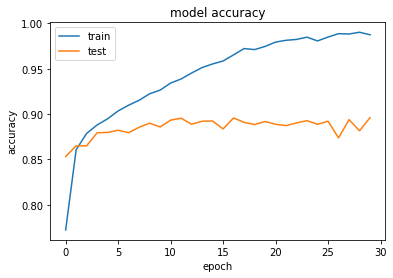

In [26]:
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

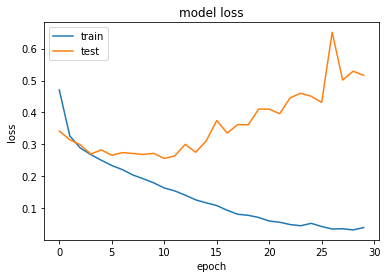

In [27]:
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [28]:
model.save('model_111.h5')

In [37]:
Y_pred=model.predict(X_test)

In [38]:
Y_pred

array([[6.8722665e-02, 9.2661524e-01],
       [6.3886164e-06, 9.9999332e-01],
       [9.0867281e-04, 9.9923939e-01],
       ...,
       [2.4577398e-08, 1.0000000e+00],
       [1.0000000e+00, 1.3004753e-11],
       [4.9257278e-04, 9.9954462e-01]], dtype=float32)

In [39]:
Y_pred=Y_pred.argmax(axis=1)

In [40]:
Y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      3724
           1       0.91      0.87      0.89      3389

    accuracy                           0.89      7113
   macro avg       0.90      0.89      0.89      7113
weighted avg       0.90      0.89      0.89      7113

